<a href="https://colab.research.google.com/github/mushagasha-h/Maize-Disease-Classifier/blob/main/Maize_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Organize data into train, valid, test dirs
os.chdir('/content/drive/MyDrive/Maize_leaf_desease_data')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 4):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 150)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 150)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [ ]:
train_path = '/content/drive/MyDrive/Maize_leaf_desease_data/train'
valid_path = '/content/drive/MyDrive/Maize_leaf_desease_data/valid'
test_path = '/content/drive/MyDrive/Maize_leaf_desease_data/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 3562 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


# **MODIFY THE MODEL**

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                 

In [ ]:
x = mobile.layers[-5].output


In [ ]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=4, activation='softmax')(x)

In [ ]:
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in model.layers[:-22]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

# **Train the model**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=50,
            verbose=2
)

Epoch 1/50
357/357 - 2428s - loss: 0.3180 - accuracy: 0.8779 - val_loss: 0.2005 - val_accuracy: 0.9333 - 2428s/epoch - 7s/step
Epoch 2/50
357/357 - 252s - loss: 0.1111 - accuracy: 0.9635 - val_loss: 0.1248 - val_accuracy: 0.9467 - 252s/epoch - 706ms/step
Epoch 3/50
357/357 - 255s - loss: 0.0638 - accuracy: 0.9818 - val_loss: 0.1945 - val_accuracy: 0.9333 - 255s/epoch - 715ms/step
Epoch 4/50
357/357 - 253s - loss: 0.0509 - accuracy: 0.9854 - val_loss: 0.1183 - val_accuracy: 0.9650 - 253s/epoch - 709ms/step
Epoch 5/50
357/357 - 251s - loss: 0.0334 - accuracy: 0.9944 - val_loss: 0.1059 - val_accuracy: 0.9650 - 251s/epoch - 704ms/step
Epoch 6/50
357/357 - 253s - loss: 0.0322 - accuracy: 0.9927 - val_loss: 0.1222 - val_accuracy: 0.9617 - 253s/epoch - 709ms/step
Epoch 7/50
357/357 - 250s - loss: 0.0285 - accuracy: 0.9947 - val_loss: 0.1211 - val_accuracy: 0.9600 - 250s/epoch - 700ms/step
Epoch 8/50
357/357 - 250s - loss: 0.0148 - accuracy: 0.9975 - val_loss: 0.1002 - val_accuracy: 0.9667 - 2

# **Predict corn leaf disease**

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

Confusion matrix, without normalization
[[144   3   3   0]
 [  1 148   1   0]
 [  9   0 141   0]
 [  0   0   0 150]]


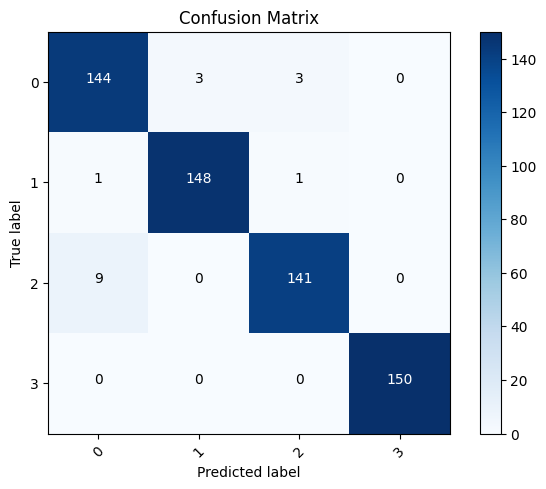

In [ ]:
labels = ['0','1','2','3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Saved Model/mobilNet_maize_leaf_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
